In [1]:
import pymysql
import pandas as pd
import sklearn

conn = pymysql.connect(host='localhost', port = 3306, user='root', 
            password='1234', db='INVESTAR', charset='utf8')
sql = "SELECT * FROM test_data"
df = pd.read_sql(sql, conn)

df_shuffled = sklearn.utils.shuffle(df)

x = df_shuffled.drop(['Result'], axis = 1)
y = df_shuffled[['Result']]
x = pd.get_dummies(x, drop_first = True)
y = pd.get_dummies(y)


dummies_df = pd.get_dummies(df)
dummies_df.head()

,Direction_상승형,Direction_직선형,Direction_하락형,Col1_D1,Col1_D10,Col1_D2,Col1_D3,Col1_D4,Col1_D5,Col1_D6,...,Col2_U3,Col2_U4,Col2_U5,Col2_U6,Col2_U7,Col2_U8,Col2_U9,Result_보합,Result_상승,Result_하락
0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [2]:
import numpy as np
x = np.array(x)
x = x.reshape(-1, 46, 1)

print(x.shape, y.shape)

(16622, 46, 1) (16622, 3)


In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle=True,random_state=1234)

In [4]:
print(x_train.shape, x_test.shape)

(13297, 46, 1) (3325, 46, 1)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Flatten, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier

In [6]:
kfold = KFold(n_splits=5, shuffle=True)
fold_no = 1
score = []
for train, test in kfold.split(x_train, y_train):
    x_train_train, x_train_test = x_train[train], x_train[test]
    y_train_train, y_train_test = y_train.iloc[train], y_train.iloc[test]
    
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size = 2, input_shape = (46, 1) , activation='relu', strides = 1))          
    model.add(Conv1D(filters=64, kernel_size = 2, activation='relu'))
    model.add(Conv1D(filters=32, kernel_size = 2, activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    
    es = EarlyStopping(monitor = 'loss', verbose = 1, patience = 50)
    model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    history = model.fit(x_train_train, y_train_train, batch_size = 100, epochs = 1000, callbacks=[es])    
    scores = model.evaluate(x_train_test, y_train_test, verbose=0)
    score.append(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    
    fold_no = fold_no + 1

Epoch 1/1000
107/107 [==============================] - 1s 10ms/step - loss: 1.0635 - accuracy: 0.4276
Epoch 2/1000
107/107 [==============================] - 1s 9ms/step - loss: 1.0283 - accuracy: 0.4664
Epoch 3/1000
107/107 [==============================] - 1s 9ms/step - loss: 1.0232 - accuracy: 0.4699
Epoch 4/1000
107/107 [==============================] - 1s 9ms/step - loss: 1.0235 - accuracy: 0.4691
Epoch 5/1000
107/107 [==============================] - 1s 10ms/step - loss: 1.0175 - accuracy: 0.4729
Epoch 6/1000
107/107 [==============================] - 1s 10ms/step - loss: 1.0180 - accuracy: 0.4711
Epoch 7/1000
107/107 [==============================] - 1s 9ms/step - loss: 1.0112 - accuracy: 0.4799
Epoch 8/1000
107/107 [==============================] - 1s 9ms/step - loss: 1.0117 - accuracy: 0.4786
Epoch 9/1000
107/107 [==============================] - 1s 9ms/step - loss: 1.0054 - accuracy: 0.4869
Epoch 10/1000
107/107 [==============================] - 1s 9ms/step - loss: 1.

107/107 [==============================] - 1s 10ms/step - loss: 0.9901 - accuracy: 0.4965
Epoch 80/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9866 - accuracy: 0.5028
Epoch 81/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9875 - accuracy: 0.4993
Epoch 82/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9881 - accuracy: 0.4999
Epoch 83/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9884 - accuracy: 0.5002
Epoch 84/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9865 - accuracy: 0.5015
Epoch 85/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9878 - accuracy: 0.5006
Epoch 86/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9852 - accuracy: 0.5010
Epoch 87/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9873 - accuracy: 0.4960
Epoch 88/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.985

107/107 [==============================] - 1s 9ms/step - loss: 0.9831 - accuracy: 0.5000
Epoch 158/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9835 - accuracy: 0.5038
Epoch 159/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9801 - accuracy: 0.5027
Epoch 160/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9800 - accuracy: 0.5004
Epoch 161/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9816 - accuracy: 0.5068
Epoch 162/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9827 - accuracy: 0.5019
Epoch 163/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9823 - accuracy: 0.5012
Epoch 164/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9831 - accuracy: 0.5013
Epoch 165/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9817 - accuracy: 0.5048
Epoch 166/1000
107/107 [==============================] - 1s 9ms/step - loss: 0

107/107 [==============================] - 1s 9ms/step - loss: 0.9775 - accuracy: 0.5000
Epoch 236/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9794 - accuracy: 0.5031
Epoch 237/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9772 - accuracy: 0.5049
Epoch 238/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9789 - accuracy: 0.5063
Epoch 239/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9809 - accuracy: 0.5038
Epoch 240/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9788 - accuracy: 0.5090
Epoch 241/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9772 - accuracy: 0.5069
Epoch 242/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9803 - accuracy: 0.5004
Epoch 243/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9805 - accuracy: 0.5069
Epoch 244/1000
107/107 [==============================] - 1s 9ms/step - loss: 0

107/107 [==============================] - 1s 9ms/step - loss: 1.0220 - accuracy: 0.4752
Epoch 4/1000
107/107 [==============================] - 1s 9ms/step - loss: 1.0153 - accuracy: 0.4796
Epoch 5/1000
107/107 [==============================] - 1s 9ms/step - loss: 1.0114 - accuracy: 0.4808
Epoch 6/1000
107/107 [==============================] - 1s 9ms/step - loss: 1.0115 - accuracy: 0.4838
Epoch 7/1000
107/107 [==============================] - 1s 9ms/step - loss: 1.0069 - accuracy: 0.4803
Epoch 8/1000
107/107 [==============================] - 1s 9ms/step - loss: 1.0044 - accuracy: 0.4879
Epoch 9/1000
107/107 [==============================] - 1s 9ms/step - loss: 1.0003 - accuracy: 0.4916
Epoch 10/1000
107/107 [==============================] - 1s 9ms/step - loss: 1.0045 - accuracy: 0.4857
Epoch 11/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9997 - accuracy: 0.4890
Epoch 12/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9985 - accura

107/107 [==============================] - 1s 9ms/step - loss: 0.9826 - accuracy: 0.5060
Epoch 83/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9829 - accuracy: 0.5044
Epoch 84/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9810 - accuracy: 0.5042
Epoch 85/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9840 - accuracy: 0.5014
Epoch 86/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9810 - accuracy: 0.5040
Epoch 87/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9838 - accuracy: 0.5060
Epoch 88/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9831 - accuracy: 0.5003
Epoch 89/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9815 - accuracy: 0.5054
Epoch 90/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9813 - accuracy: 0.5039
Epoch 91/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9832 -

107/107 [==============================] - 1s 9ms/step - loss: 0.9770 - accuracy: 0.5068
Epoch 161/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9778 - accuracy: 0.5073
Epoch 162/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9743 - accuracy: 0.5091
Epoch 163/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9803 - accuracy: 0.5034
Epoch 164/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9760 - accuracy: 0.5108
Epoch 165/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9772 - accuracy: 0.5074
Epoch 166/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9729 - accuracy: 0.5126
Epoch 167/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9798 - accuracy: 0.5077
Epoch 168/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9777 - accuracy: 0.5070
Epoch 169/1000
107/107 [==============================] - 1s 9ms/step - loss: 

107/107 [==============================] - 1s 9ms/step - loss: 0.9750 - accuracy: 0.5065
Epoch 239/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9764 - accuracy: 0.5126
Epoch 240/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9783 - accuracy: 0.5078
Epoch 241/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9752 - accuracy: 0.5081
Epoch 242/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9737 - accuracy: 0.5074
Epoch 243/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9748 - accuracy: 0.5078
Epoch 244/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9716 - accuracy: 0.5093
Epoch 245/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9738 - accuracy: 0.5135
Epoch 246/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9753 - accuracy: 0.5047
Epoch 247/1000
107/107 [==============================] - 1s 9ms/step - loss: 

107/107 [==============================] - 1s 10ms/step - loss: 0.9826 - accuracy: 0.5053
Epoch 63/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9840 - accuracy: 0.5040
Epoch 64/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9825 - accuracy: 0.5074
Epoch 65/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9821 - accuracy: 0.5069
Epoch 66/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9844 - accuracy: 0.5028
Epoch 67/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9840 - accuracy: 0.5079
Epoch 68/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9872 - accuracy: 0.5048
Epoch 69/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9841 - accuracy: 0.5030
Epoch 70/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9844 - accuracy: 0.5030
Epoch 71/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9854

107/107 [==============================] - 1s 10ms/step - loss: 0.9767 - accuracy: 0.5092
Epoch 141/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9753 - accuracy: 0.5089
Epoch 142/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9777 - accuracy: 0.5049
Epoch 143/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9734 - accuracy: 0.5098
Epoch 144/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9738 - accuracy: 0.5120
Epoch 145/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9766 - accuracy: 0.5086
Epoch 146/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9739 - accuracy: 0.5091
Epoch 147/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9771 - accuracy: 0.5096
Epoch 148/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9762 - accuracy: 0.5138
Epoch 149/1000
107/107 [==============================] - 1s 9ms/step - l

107/107 [==============================] - 1s 9ms/step - loss: 0.9748 - accuracy: 0.5106
Epoch 219/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9724 - accuracy: 0.5128
Epoch 220/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9741 - accuracy: 0.5094
Epoch 221/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9726 - accuracy: 0.5124
Epoch 222/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9752 - accuracy: 0.5118
Epoch 223/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9759 - accuracy: 0.5094
Epoch 224/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9710 - accuracy: 0.5127
Epoch 225/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9722 - accuracy: 0.5107
Epoch 226/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9696 - accuracy: 0.5090
Epoch 227/1000
107/107 [==============================] - 1s 10ms/step - lo

107/107 [==============================] - 1s 10ms/step - loss: 0.9895 - accuracy: 0.4979
Epoch 34/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9918 - accuracy: 0.4941
Epoch 35/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9890 - accuracy: 0.4982
Epoch 36/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9863 - accuracy: 0.4969 0s - loss: 0.9849 - accuracy
Epoch 37/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9881 - accuracy: 0.4959
Epoch 38/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9903 - accuracy: 0.4992 0s - los
Epoch 39/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9895 - accuracy: 0.5007
Epoch 40/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9899 - accuracy: 0.4962
Epoch 41/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9922 - accuracy: 0.4990
Epoch 42/1000
107/107 [=================

107/107 [==============================] - 1s 10ms/step - loss: 0.9821 - accuracy: 0.5047
Epoch 112/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9807 - accuracy: 0.5062
Epoch 113/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9796 - accuracy: 0.5038
Epoch 114/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9764 - accuracy: 0.5075
Epoch 115/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9791 - accuracy: 0.5044
Epoch 116/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9781 - accuracy: 0.5052
Epoch 117/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9773 - accuracy: 0.5078
Epoch 118/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9789 - accuracy: 0.5055
Epoch 119/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9787 - accuracy: 0.5036
Epoch 120/1000
107/107 [==============================] - 1s 10ms/step 

107/107 [==============================] - 1s 10ms/step - loss: 0.9742 - accuracy: 0.5068
Epoch 189/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9775 - accuracy: 0.5037
Epoch 190/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9745 - accuracy: 0.5077
Epoch 191/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9725 - accuracy: 0.5097
Epoch 192/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9769 - accuracy: 0.5099
Epoch 193/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9738 - accuracy: 0.5076
Epoch 194/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9742 - accuracy: 0.5086
Epoch 195/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9718 - accuracy: 0.5127
Epoch 196/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9781 - accuracy: 0.5061
Epoch 197/1000
107/107 [==============================] - 1s 9ms/step - l

107/107 [==============================] - 1s 10ms/step - loss: 0.9728 - accuracy: 0.5082
Epoch 267/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9758 - accuracy: 0.5084
Epoch 268/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9707 - accuracy: 0.5125
Epoch 269/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9721 - accuracy: 0.5081
Epoch 270/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9725 - accuracy: 0.5050
Epoch 271/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9728 - accuracy: 0.5072
Epoch 272/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9734 - accuracy: 0.5078
Epoch 273/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9698 - accuracy: 0.5098
Epoch 274/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9708 - accuracy: 0.5118
Epoch 275/1000
107/107 [==============================] - 1s 9ms/step - l

107/107 [==============================] - 1s 9ms/step - loss: 0.9848 - accuracy: 0.4972
Epoch 59/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9845 - accuracy: 0.4984
Epoch 60/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9837 - accuracy: 0.4954
Epoch 61/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9851 - accuracy: 0.4978
Epoch 62/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9880 - accuracy: 0.4969
Epoch 63/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9870 - accuracy: 0.4953
Epoch 64/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9816 - accuracy: 0.4964
Epoch 65/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9878 - accuracy: 0.4959
Epoch 66/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9848 - accuracy: 0.4994
Epoch 67/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9829 

107/107 [==============================] - 1s 9ms/step - loss: 0.9784 - accuracy: 0.5005
Epoch 137/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9799 - accuracy: 0.5010
Epoch 138/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9799 - accuracy: 0.4994
Epoch 139/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9781 - accuracy: 0.4984
Epoch 140/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9775 - accuracy: 0.5007
Epoch 141/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9792 - accuracy: 0.5053
Epoch 142/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9787 - accuracy: 0.5026
Epoch 143/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9750 - accuracy: 0.5025
Epoch 144/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9769 - accuracy: 0.5011
Epoch 145/1000
107/107 [==============================] - 1s 9ms/step - los

107/107 [==============================] - 1s 10ms/step - loss: 0.9755 - accuracy: 0.4998
Epoch 215/1000
107/107 [==============================] - 1s 10ms/step - loss: 0.9753 - accuracy: 0.5025
Epoch 216/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9741 - accuracy: 0.5033
Epoch 217/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9752 - accuracy: 0.5007
Epoch 218/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9752 - accuracy: 0.5010
Epoch 219/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9771 - accuracy: 0.5039
Epoch 220/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9751 - accuracy: 0.5024
Epoch 221/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9752 - accuracy: 0.5015
Epoch 222/1000
107/107 [==============================] - 1s 9ms/step - loss: 0.9754 - accuracy: 0.5024
Epoch 223/1000
107/107 [==============================] - 1s 9ms/step - loss:

In [7]:
for i in score:
    print(i)

Score for fold 1: loss of 1.0203437805175781; accuracy of 49.96240735054016%
Score for fold 2: loss of 1.0200837850570679; accuracy of 48.79699349403381%
Score for fold 3: loss of 1.0281177759170532; accuracy of 47.574275732040405%
Score for fold 4: loss of 1.0486916303634644; accuracy of 47.273412346839905%
Score for fold 5: loss of 1.0395861864089966; accuracy of 49.417075514793396%


In [8]:
model = Sequential()
model.add(Conv1D(filters=128, kernel_size = 2, input_shape = (46, 1) , activation='relu', strides = 1))          
model.add(Conv1D(filters=64, kernel_size = 2, activation='relu'))
model.add(Conv1D(filters=32, kernel_size = 2, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

Epoch 1/1000
133/133 [==============================] - 2s 11ms/step - loss: 1.0485 - accuracy: 0.4490 - val_loss: 1.0191 - val_accuracy: 0.4710

Epoch 00001: val_loss improved from inf to 1.01906, saving model to best_model.h5
Epoch 2/1000
133/133 [==============================] - 1s 11ms/step - loss: 1.0237 - accuracy: 0.4679 - val_loss: 1.0150 - val_accuracy: 0.4788

Epoch 00002: val_loss improved from 1.01906 to 1.01502, saving model to best_model.h5
Epoch 3/1000
133/133 [==============================] - 1s 11ms/step - loss: 1.0175 - accuracy: 0.4710 - val_loss: 1.0091 - val_accuracy: 0.4788

Epoch 00003: val_loss improved from 1.01502 to 1.00912, saving model to best_model.h5
Epoch 4/1000
133/133 [==============================] - 1s 11ms/step - loss: 1.0129 - accuracy: 0.4743 - val_loss: 1.0085 - val_accuracy: 0.4785

Epoch 00004: val_loss improved from 1.00912 to 1.00845, saving model to best_model.h5
Epoch 5/1000
133/133 [==============================] - 1s 11ms/step - loss:

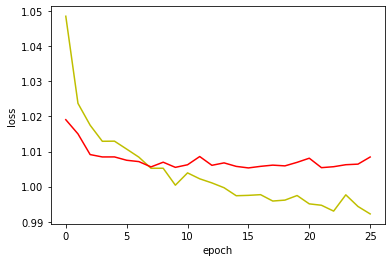

In [9]:
es = EarlyStopping(monitor = 'val_loss', verbose = 1, patience = 10)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_loss', verbose = 1, save_best_only = True)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, batch_size = 100, epochs = 1000, validation_data = (x_test, y_test), callbacks=[es, mc])

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

plt.show()

In [10]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))

104/104 [==============================] - 0s 2ms/step - loss: 1.0053 - accuracy: 0.4800

 테스트 정확도: 0.4800


In [209]:
pd.set_option('display.max_rows', None)
df_group = df.groupby(['Col1', 'Col2', 'Result']).count()
df_group

Direction
Col1 Col2 Result           
D1   D1   보합            224
          상승            338
          하락            102
     D10  보합             18
          상승             28
          하락             16
     D2   보합             10
          상승             23
          하락             10
     D3   보합             51
          상승             62
          하락              6
     D4   보합              3
          상승             12
     D5   보합              2
          상승              1
     D6   보합              4
          상승              5
          하락              2
     D7   보합              8
          상승             10
          하락              7
     D8   보합              8
          상승              2
          하락              5
     D9   보합             56
          상승             33
          하락             37
     E2   보합            211
          상승             83
          하락            133
     E3   보합             67
          상승             43
          하락             37
     E4   보합             22
          상승             24
          하락             10
     U1   보합            177
          상승             38
          하락            152
     U10  보합              5
          상승              3
          하락             13
     U2   보합             24
          상승              6
          하락             26
     U3   보합             60
          상승             10
          하락             51
     U4   보합             14
          상승              4
          하락             14
     U5   상승              1
     U6   보합              2
          상승              2
          하락              5
     U7   보합              5
          상승              6
          하락              5
     U8   보합              5
          상승              1
          하락              2
     U9   보합             27
          상승             15
          하락             10
D10  D1   보합              3
          상승              9
          하락              2
     D10  상승              1
     D2   보합              1
          상승              1
     D4   상승              1
     D6   상승              2
          하락              1
     D7   상승              2
     D9   보합              1
          상승              2
          하락              1
     E2   보합              1
          상승              1
          하락              1
     E3   상승              2
          하락              2
     E4   보합              1
          상승              1
     U1   상승              1
          하락              1
     U10  상승              2
          하락              1
     U2   보합              2
          하락              1
     U3   보합              2
          상승              1
     U4   보합              3
          하락              2
     U6   상승              1
     U7   상승              1
          하락              1
D2   D1   보합              8
          상승              7
          하락              2
     D10  보합              3
          상승              1
          하락              2
     D2   보합              1
          상승              1
          하락              1
     D3   보합              1
          상승              2
     D4   보합              1
          하락              1
     D5   상승              1
     D6   상승              2
          하락              1
     D7   상승              3
          하락              1
     D8   상승              1
          하락              4
     D9   보합              1
          상승              1
          하락              1
     E2   보합              2
          상승              1
          하락              3
     E3   보합              2
          상승              3
          하락              1
     E4   하락              1
     U1   보합              4
          상승              1
          하락              1
     U10  하락              1
     U2   보합              1
          상승              1
          하락              3
     U3   보합              1
     U4   하락              1
     U6   하락              1
     U7   상승              4
     U8   상승              1
D3   D1   보합             10
          상승  